In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
file_location="C:\\Users\\Work Only\\Downloads\\bank.csv"
fixed_deposit=pd.read_csv(file_location,sep=";")
fixed_deposit.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### Explaining the Columns

- Age---> Age of the Customers

- Job---> type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self- employed','services','student','technician','unemployed','unknown')

- Marital---> marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

- Education---> (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

- default---> has credit in default?

- balance---> average yearly balance

- housing---> has housing loan?

- loan---> has personal loan?

- Contact---> contact communication type (categorical: 'cellular','telephone')

- Day---> last contact day of the week

- Month---> last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

- duration---> last contact duration, in seconds (numeric).

- campaign---> number of contacts performed during this campaign and for this client 

- pdays---> number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)

- previous---> number of contacts performed before this campaign and for this client

- poutcome---> outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

- y---> has the client subscribed a term deposit(fixed deposit)?

### Searching for any null values

In [59]:
fixed_deposit.isnull().sum()
# They are no null values in the dataset.

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [60]:
fixed_deposit.select_dtypes(include='object').nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
y             2
dtype: int64

In [61]:
fixed_deposit.select_dtypes(include=['int','float']).nunique()

age           67
balance     2353
day           31
duration     875
campaign      32
pdays        292
previous      24
dtype: int64

# Performing Exploratory Data Analysis(EDA)

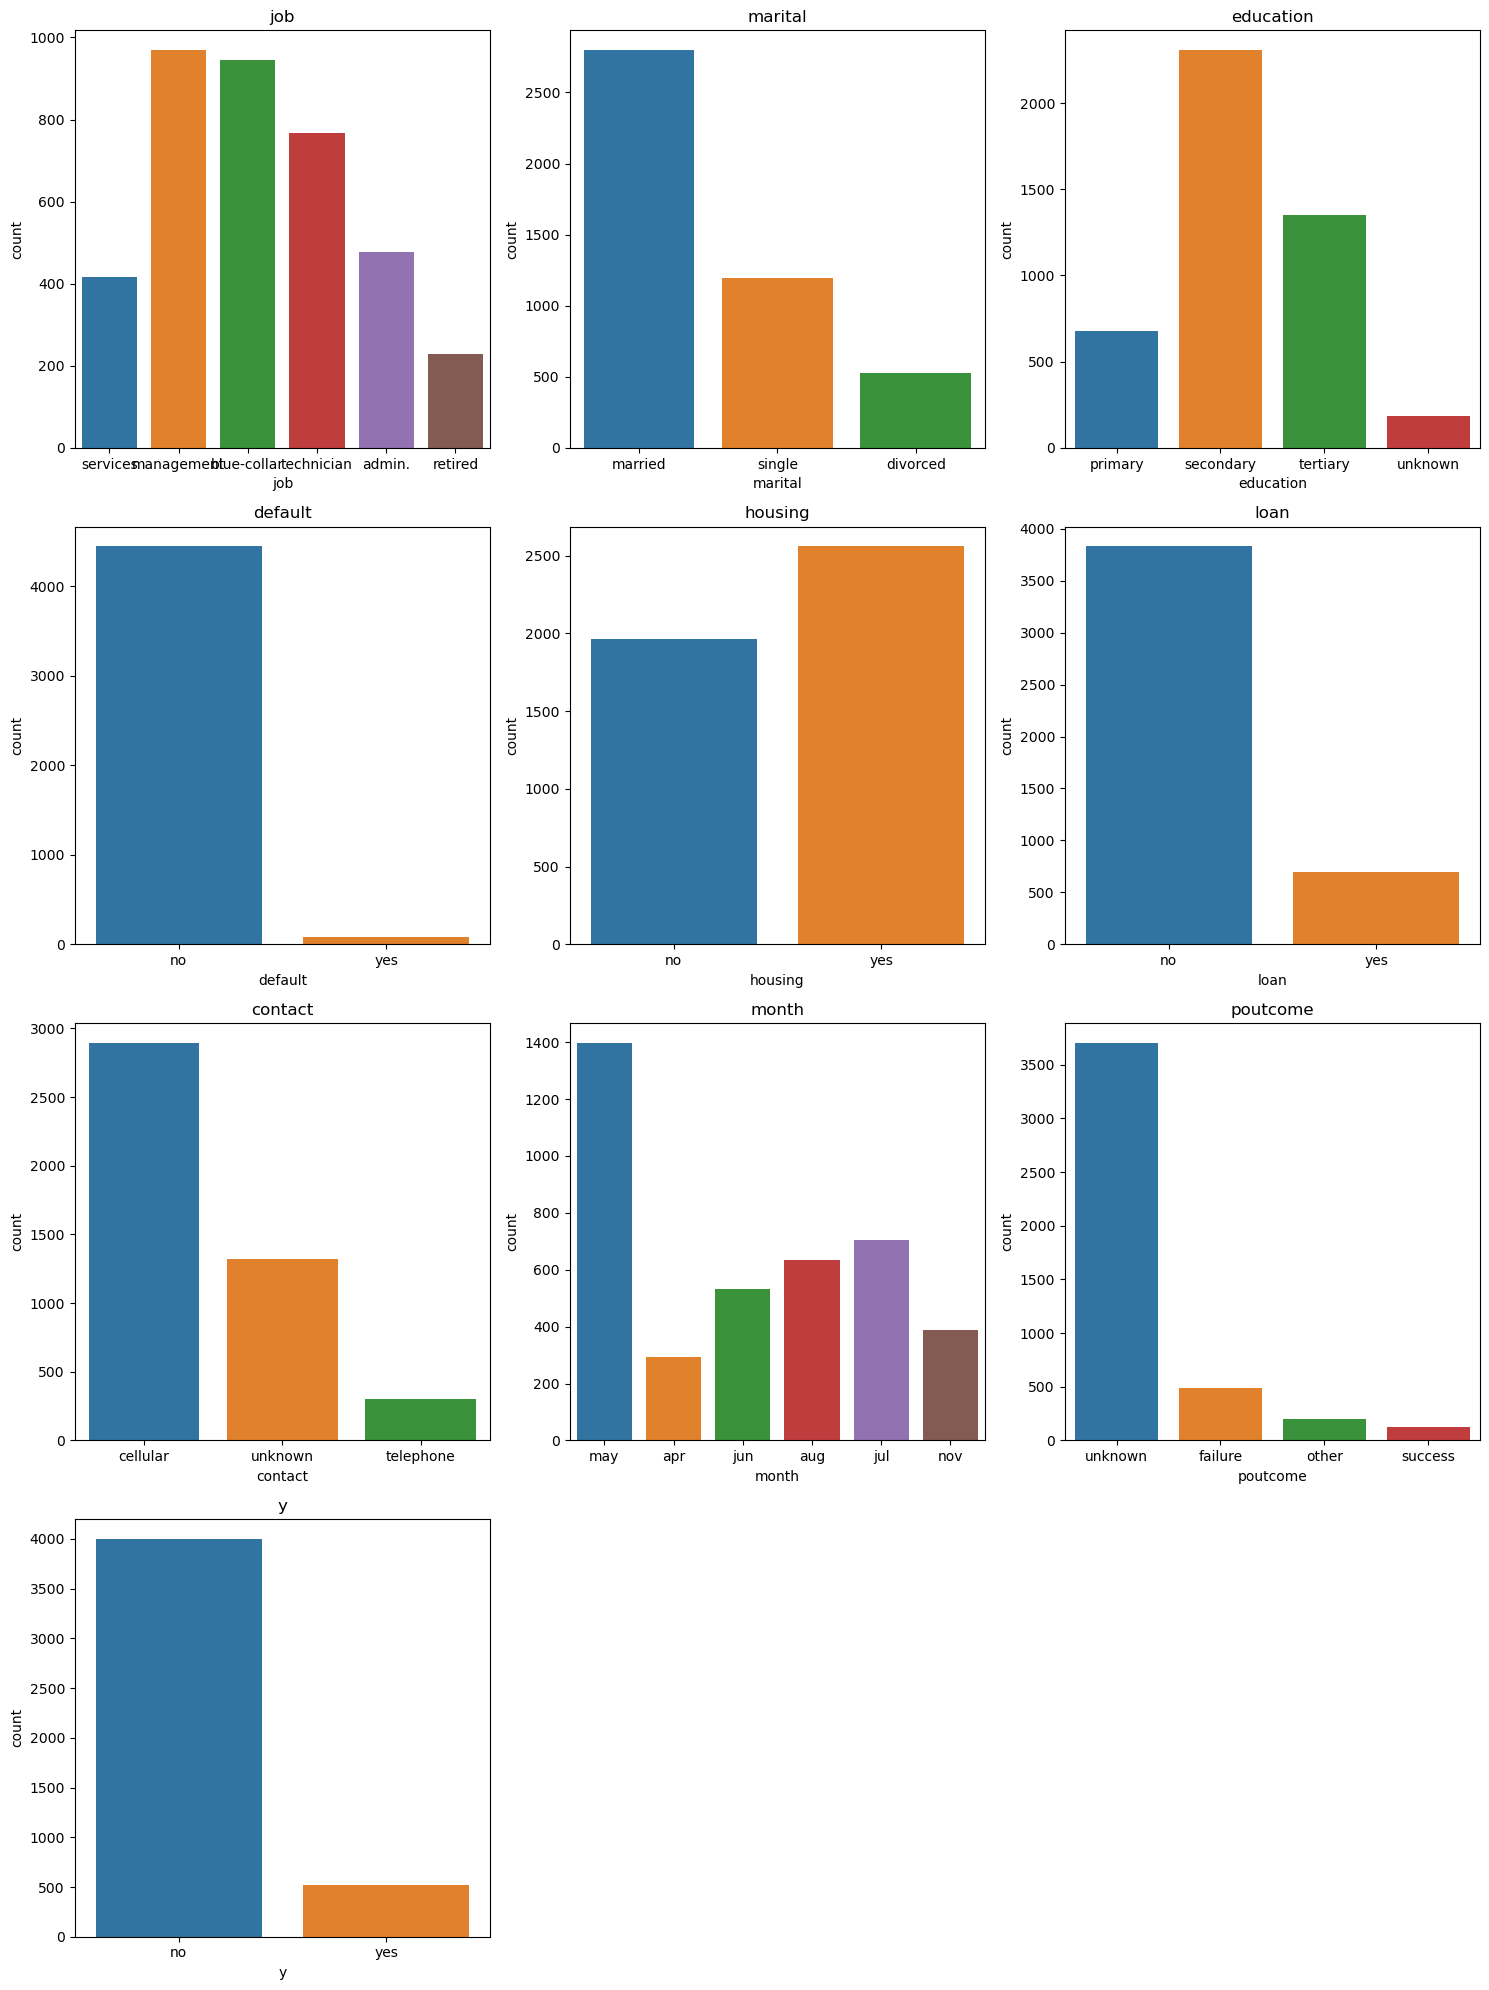

In [62]:
cat_column=fixed_deposit.select_dtypes(include='object').columns.to_list()

num_columns=len(cat_column)
num_rows=(num_columns + 2)//3
fig,ax=plt.subplots(ncols=3,nrows=num_rows,figsize=(15,num_rows*5))
ax=ax.flatten()

for i,column in enumerate(cat_column):
    top=fixed_deposit[column].value_counts().nlargest(6).index
    filtered_data=fixed_deposit[fixed_deposit[column].isin(top)]
    sns.countplot(data=filtered_data,x=column,ax=ax[i])
    ax[i].set_title(column)
    
    
if num_columns < len(ax):
    for i in range(num_columns,len(ax)):
        fig.delaxes(ax[i])
        
fig.tight_layout()


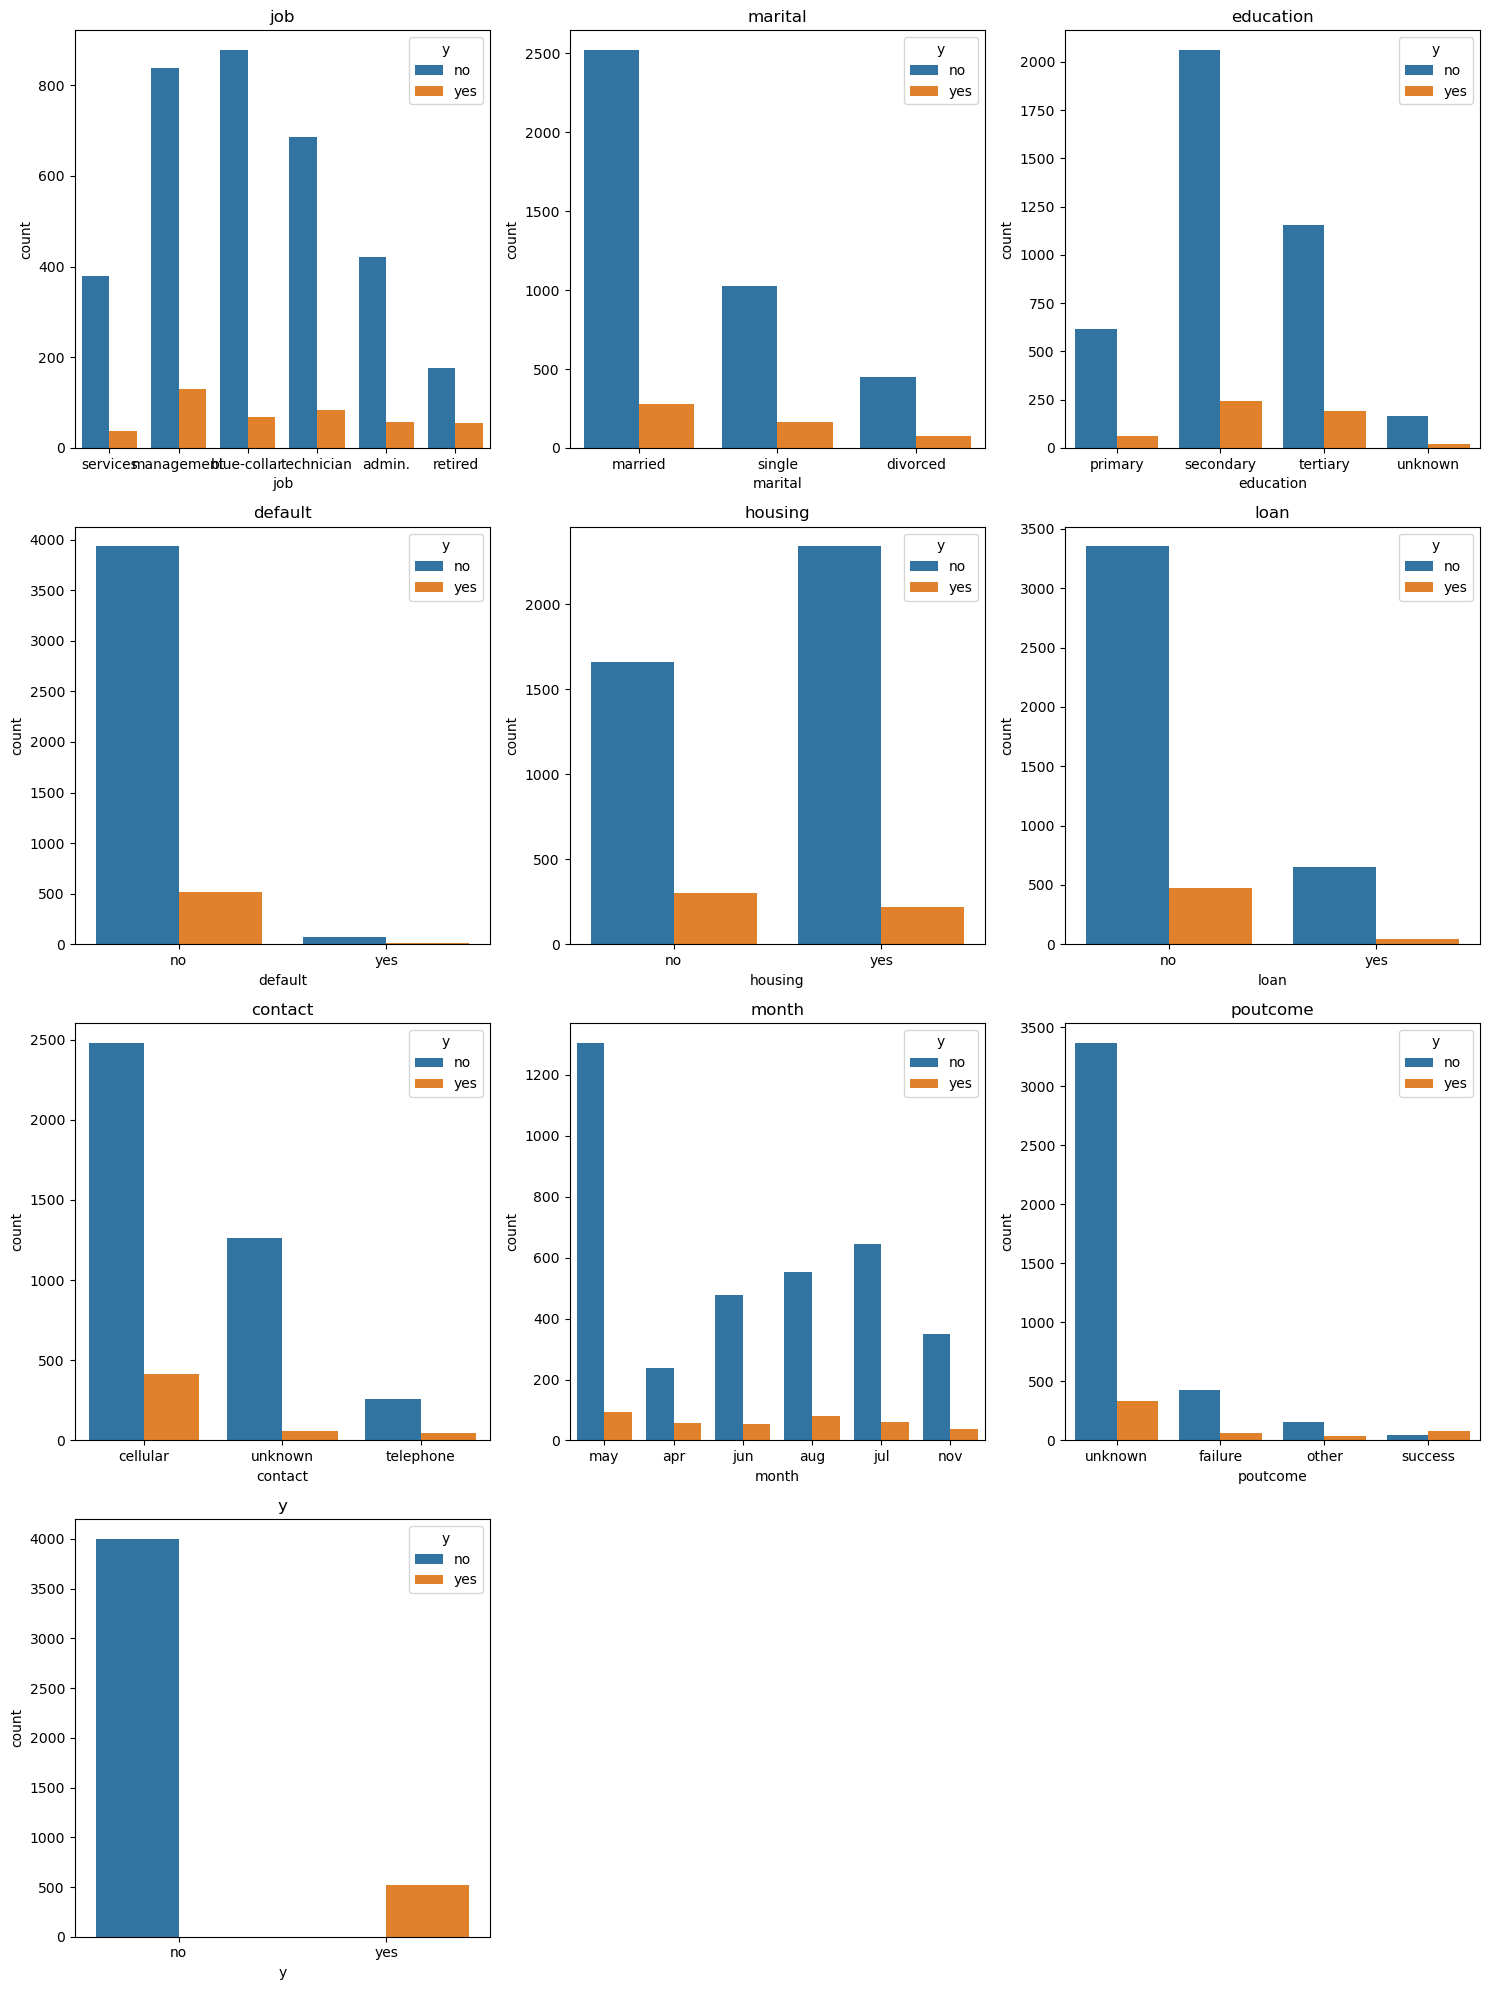

In [63]:
cat_cols=fixed_deposit.select_dtypes(include='object').columns.to_list()

num_cols=len(cat_cols)
num_rows=(num_cols + 2)//3
fig,ax=plt.subplots(ncols=3,nrows=num_rows,figsize=(15,5*num_rows))
ax=ax.flatten()

for i,column in enumerate(cat_cols):
    top=fixed_deposit[column].value_counts().nlargest(6).index
    filtered_data=fixed_deposit[fixed_deposit[column].isin(top)]
    sns.countplot(data=filtered_data,x=column,ax=ax[i],hue='y')
    ax[i].set_title(column)
    
if num_cols < len(ax):
    for i in range(num_cols,len(ax)):
        fig.delaxes(ax[i])
        
fig.tight_layout()

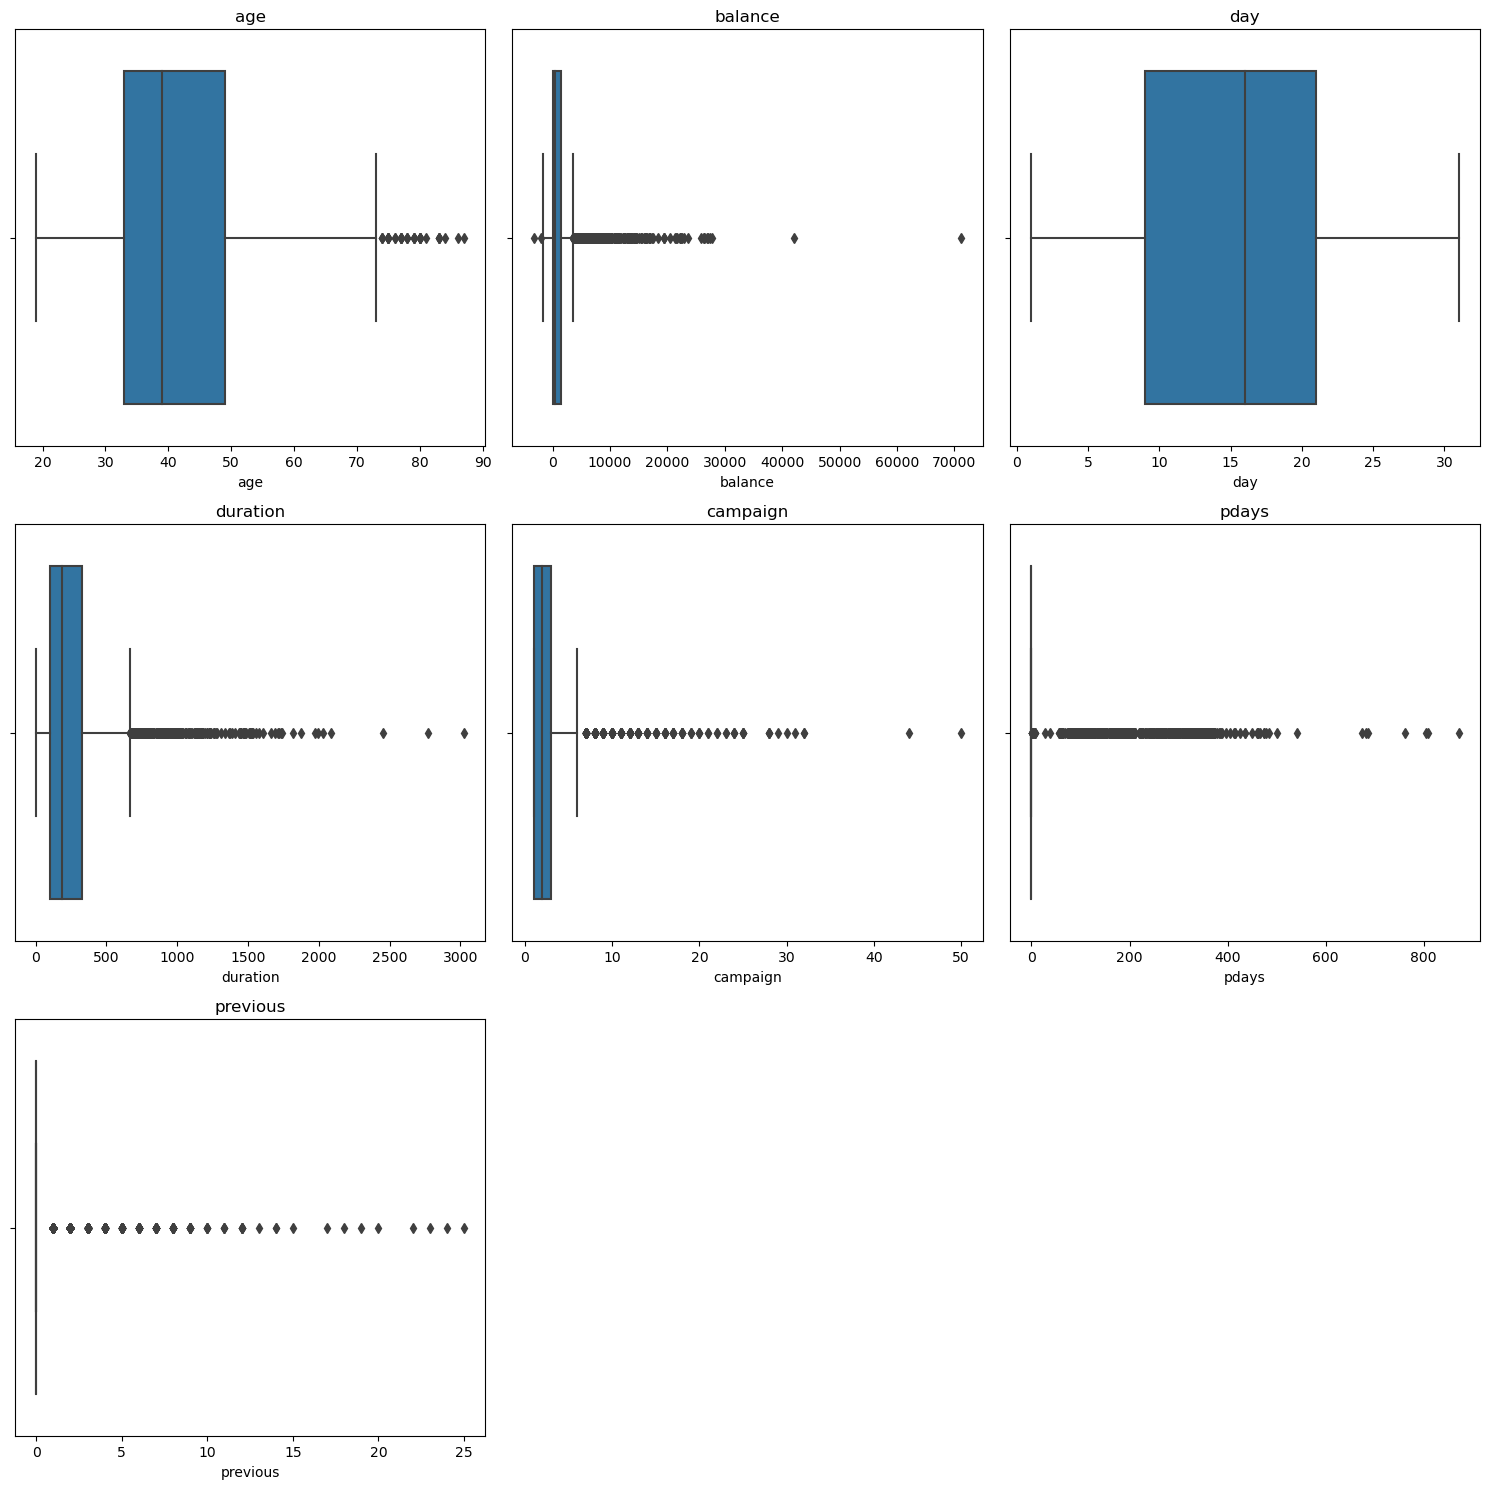

In [64]:
numerical_columns=fixed_deposit.select_dtypes(include=['int','float']).columns.to_list()

num_cols= len(numerical_columns)
num_rows= (num_cols + 2)//3
fig,ax=plt.subplots(ncols=3,nrows=num_rows,figsize=(15,num_rows*5))
ax=ax.flatten()

for i,column in enumerate(numerical_columns):
    sns.boxplot(data=fixed_deposit,x=column,ax=ax[i])
    ax[i].set_title(column)
    
if num_cols < len(ax):
    for i in range(num_cols,len(ax)):
        fig.delaxes(ax[i])
        
fig.tight_layout()

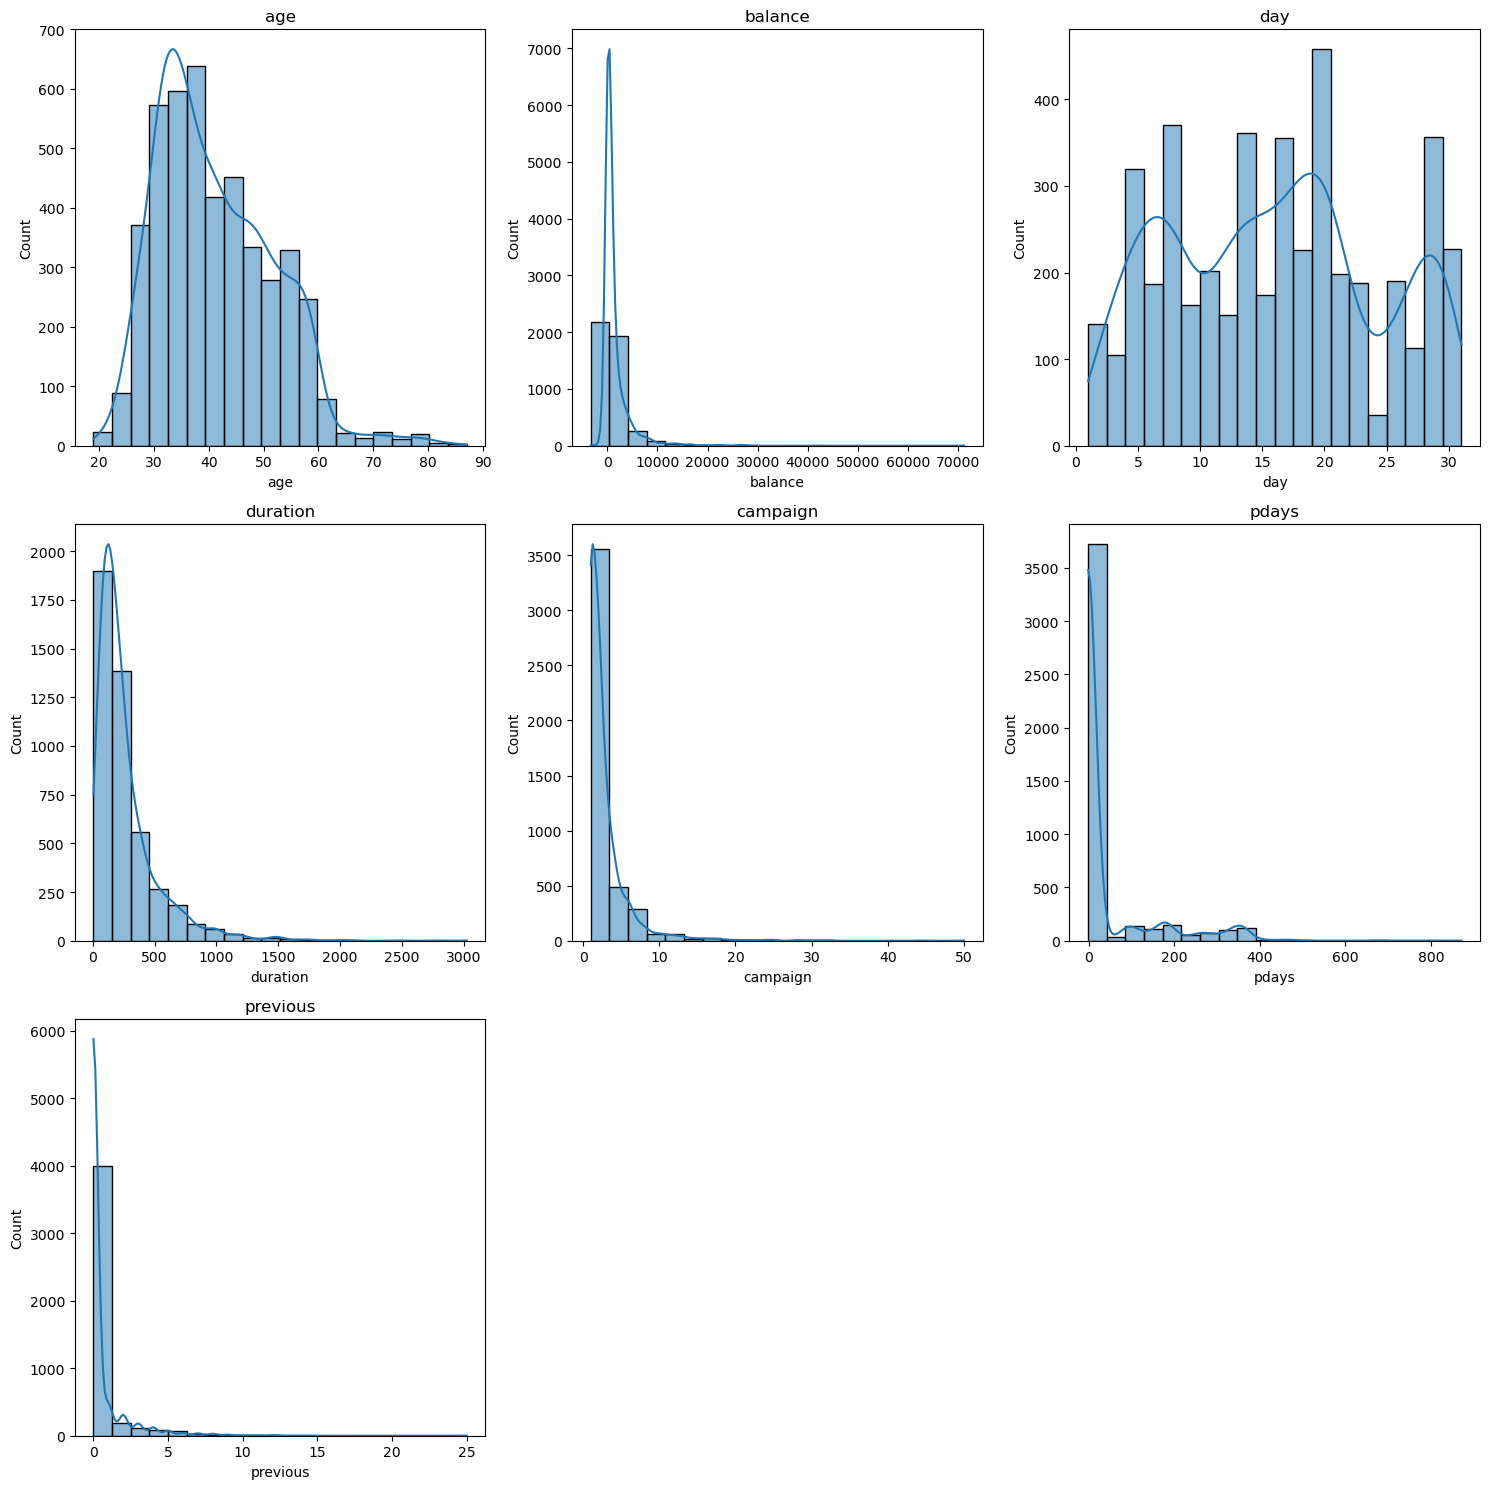

In [65]:
numerical_column=fixed_deposit.select_dtypes(include=['int','float']).columns.to_list()
num_cols=len(numerical_column)
num_rows=(num_cols +2 )//3
fig,ax=plt.subplots(ncols=3,nrows=num_rows,figsize=(15,5*num_rows))
ax=ax.flatten()
for i,column in enumerate(numerical_column):
    sns.histplot(data=fixed_deposit,x=column,ax=ax[i],bins=20,kde=True)
    ax[i].set_title(column)
    
if num_cols < len(ax):
    for i in range(num_cols,len(ax)):
        fig.delaxes(ax[i])
        
fig.tight_layout()

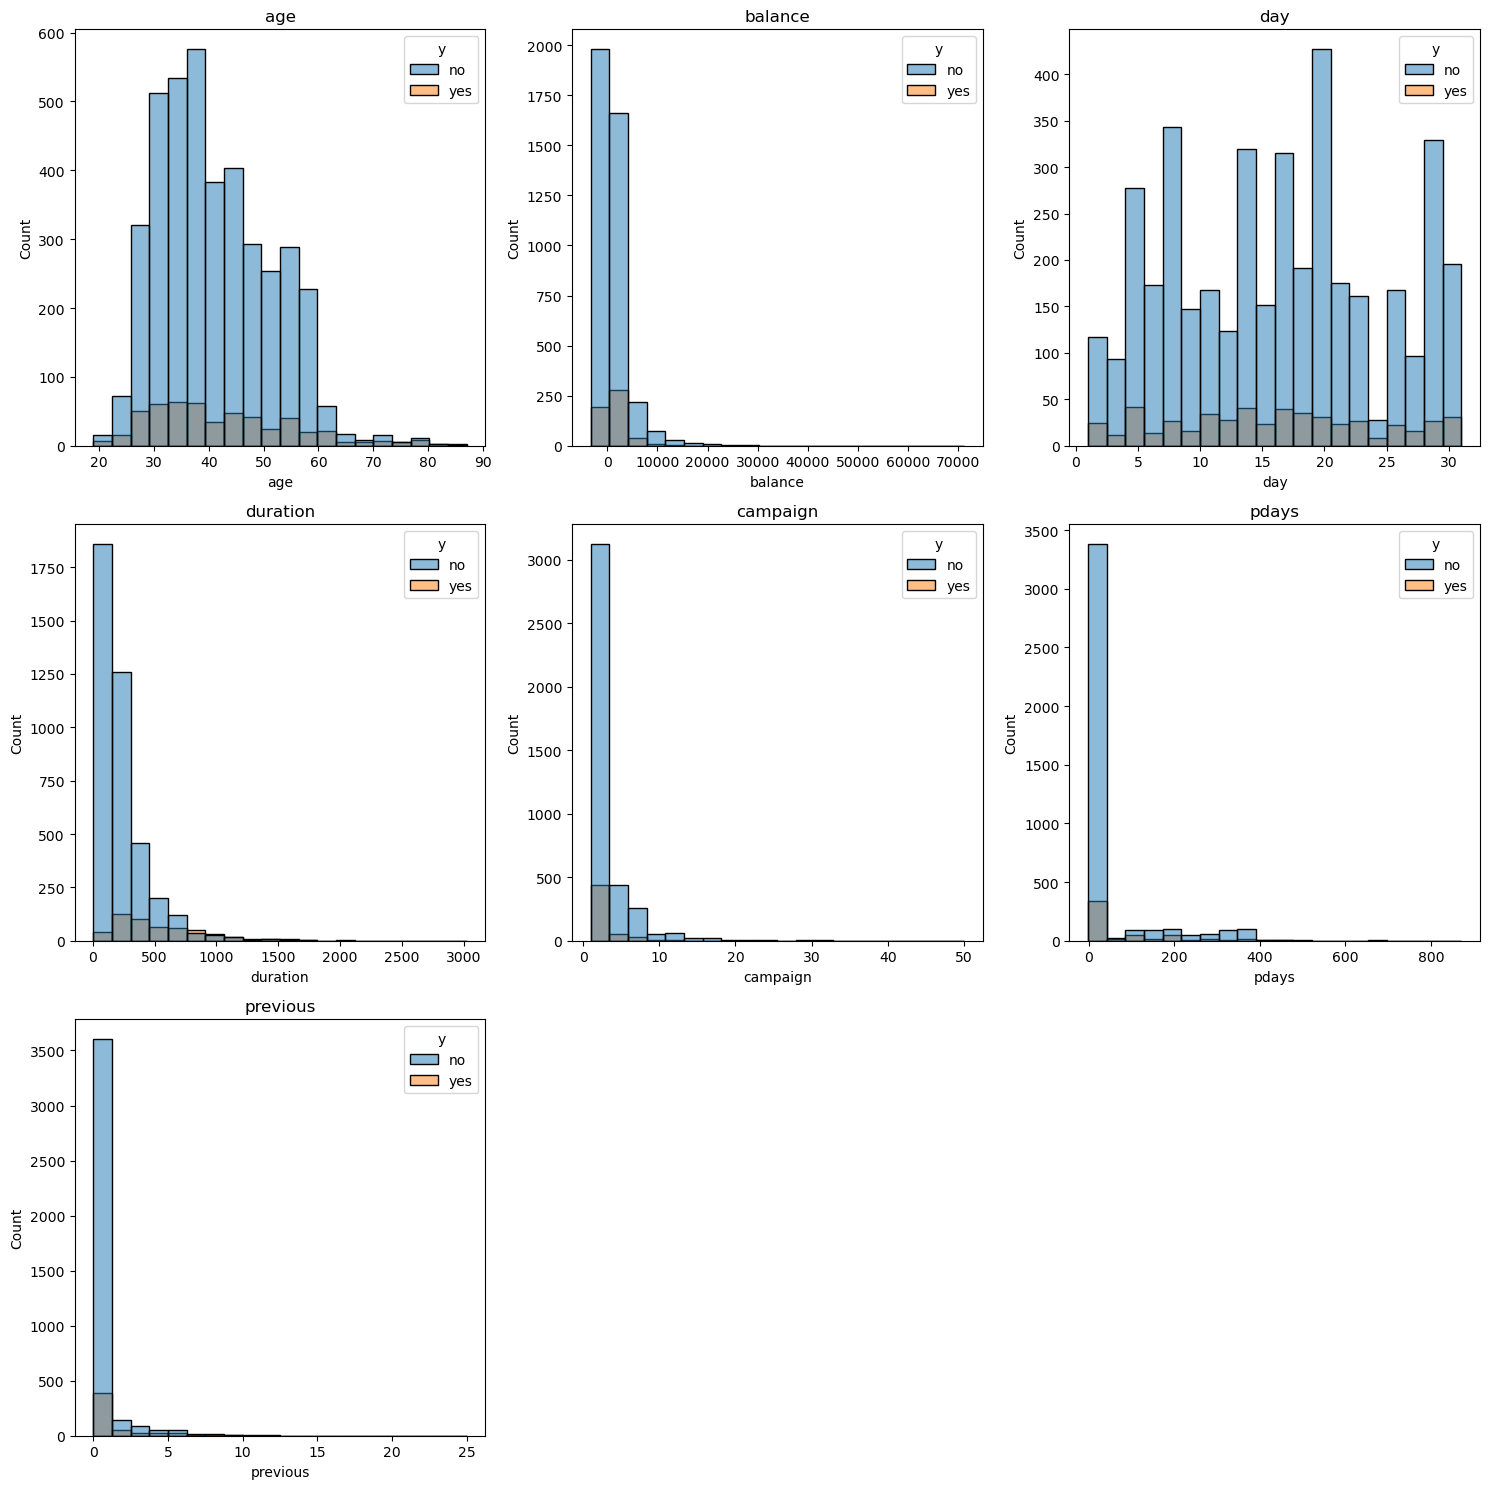

In [66]:
numerical_columns = fixed_deposit.select_dtypes(include=['int','float']).columns.to_list()

num_cols=len(numerical_columns)
num_rows=(num_cols + 2 )//3
fig,ax=plt.subplots(ncols=3,nrows=num_rows,figsize=(15,5*num_rows))
ax=ax.flatten()

for i,column in enumerate(numerical_columns):
    sns.histplot(data=fixed_deposit,x=column,ax=ax[i],hue='y',bins=20)
    ax[i].set_title(column)
    
if num_cols < len(ax):
    for i in range(num_cols,len(ax)):
        fig.delaxes(ax[i])
        
fig.tight_layout()

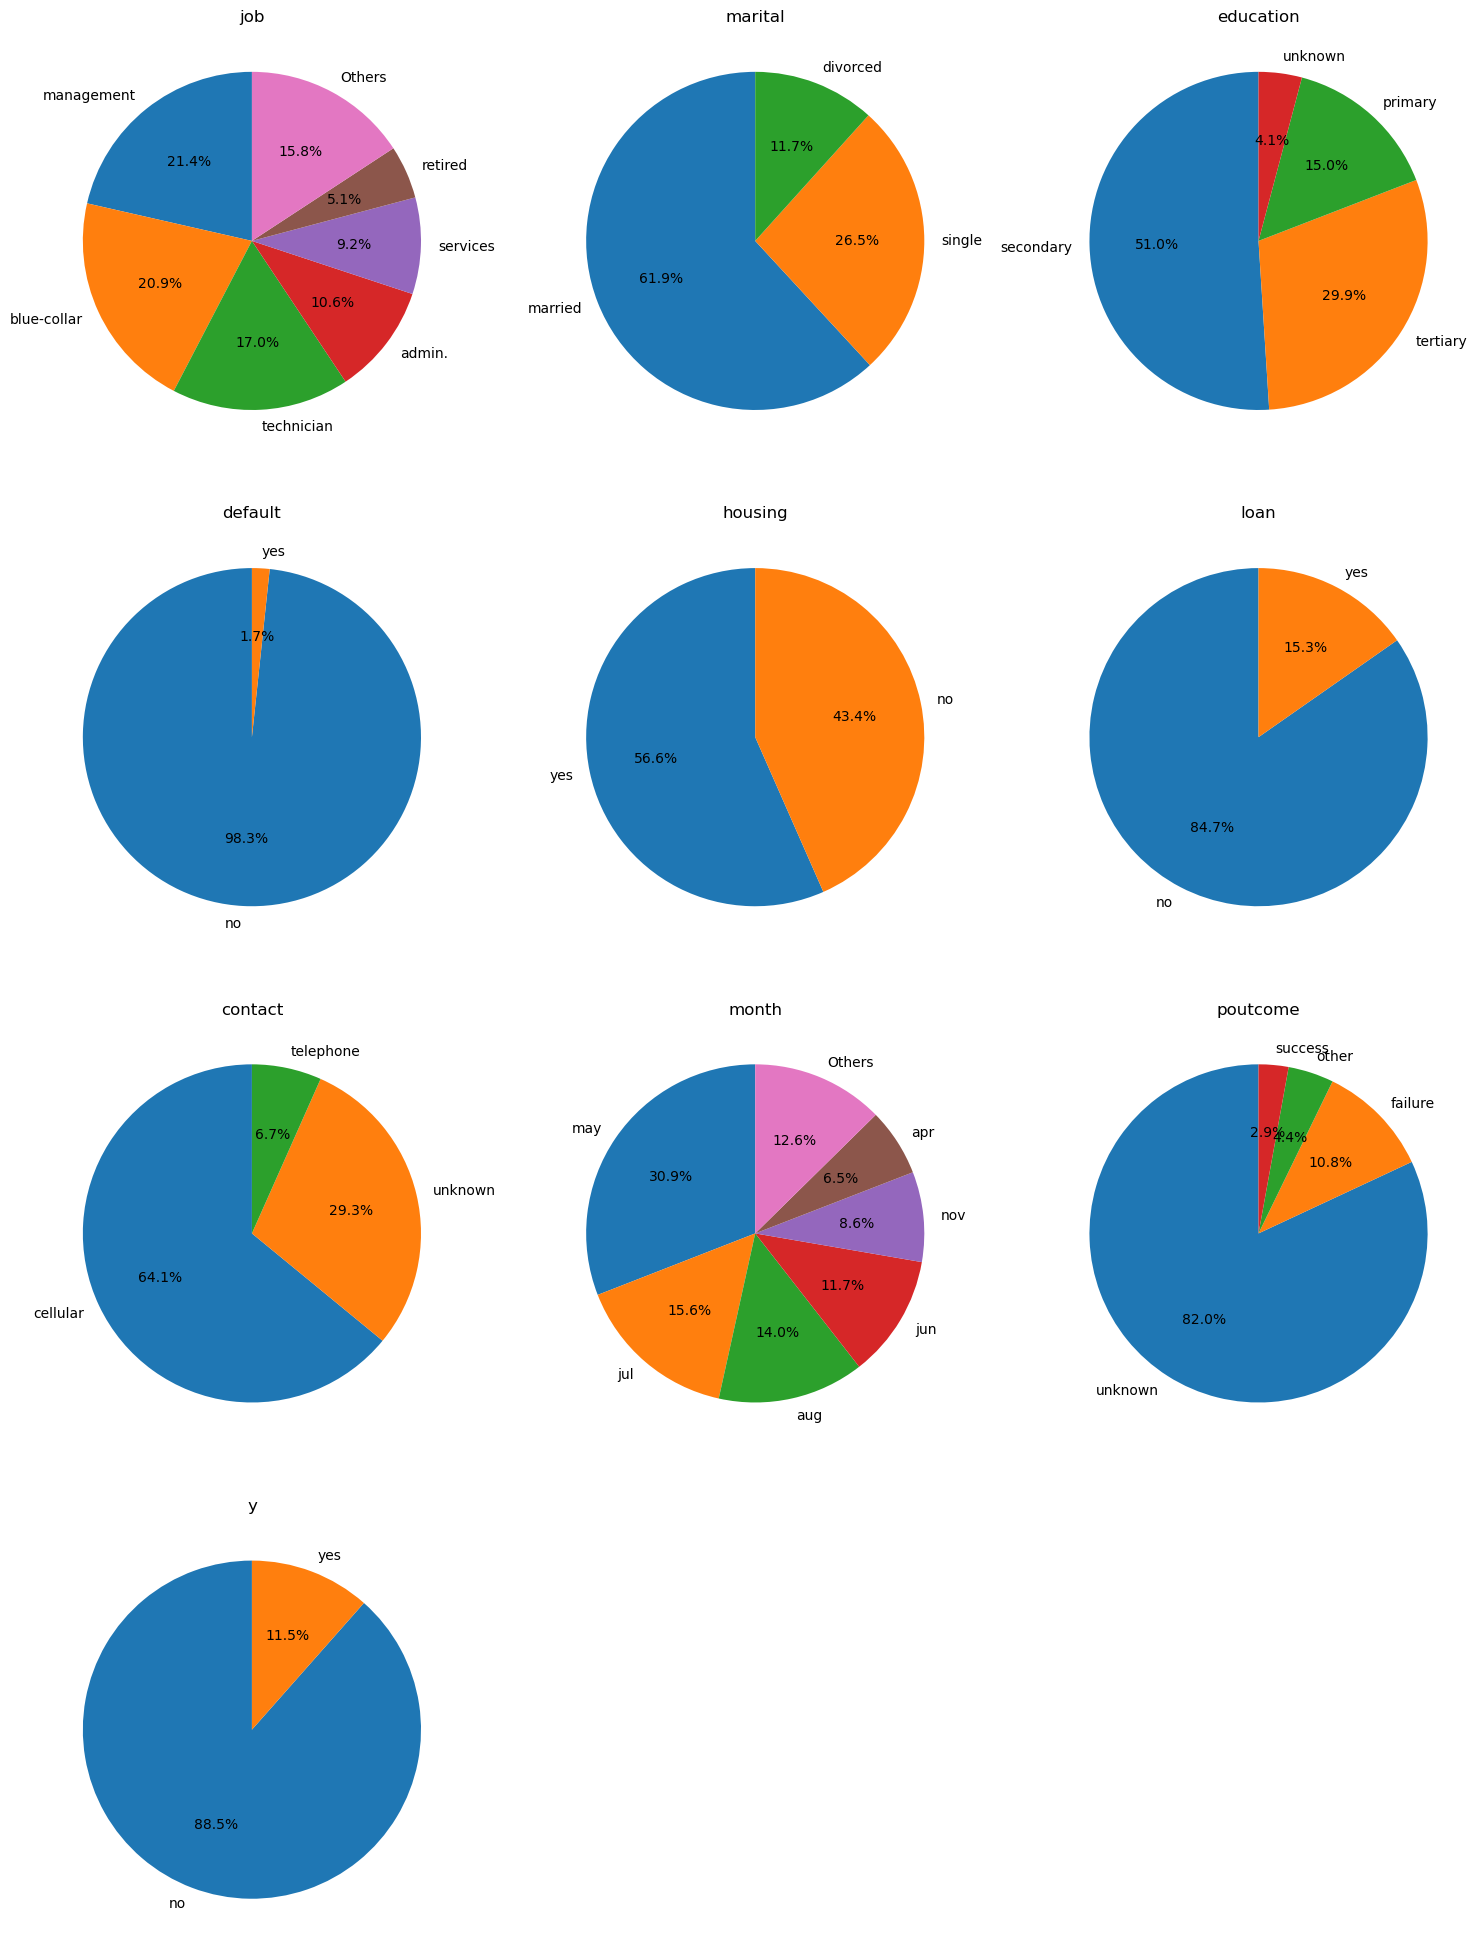

In [49]:
import warnings
warnings.filterwarnings("ignore")


max=6
cat_cols=fixed_deposit.select_dtypes(include='object').columns.to_list()

num_cols=len(cat_cols)
num_rows=(num_cols + 2)//3
fig,ax=plt.subplots(ncols=3,nrows=num_rows,figsize=(15,5*num_rows))
ax=ax.flatten()

for i,column in enumerate(cat_cols):
    
    if i<len(ax):
        cat_count=fixed_deposit[column].value_counts()
        
        if len(cat_count)>max:
            cat_count_top=cat_count[:max]
            cat_count_others=pd.Series(cat_count[max:].sum(),index=['Others'])
            cat_count=cat_count_top.append(cat_count_others)
            
            
        ax[i].pie(cat_count,labels=cat_count.index,autopct="%0.1f%%",startangle=90)
        ax[i].set_title(column)
        
        
if num_cols < len(ax):
    for i in range(num_cols,len(ax)):
        fig.delaxes(ax[i])
        
        
fig.tight_layout()

# Converting Categorical Columns to Numerical Columns

In [79]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in fixed_deposit.select_dtypes(include='object').columns.to_list():
    fixed_deposit[i]=le.fit_transform(fixed_deposit[i])

In [80]:
fixed_deposit

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


In [81]:
# Getting the Correlation Matrix
fixed_deposit.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021500,-0.381485,-0.121613,-0.017885,0.083820,-0.193888,-0.011250,0.015161,-0.017853,-0.040714,-0.002367,-0.005148,-0.008894,-0.003511,-0.009320,0.045092
job,-0.021500,1.000000,0.069390,0.170160,0.008324,0.009797,-0.128353,-0.040245,-0.074068,0.012865,-0.096613,-0.006739,-0.002739,-0.022760,0.005029,0.013049,0.027401
marital,-0.381485,0.069390,1.000000,0.102714,-0.020745,0.024971,-0.029851,-0.045210,-0.068236,0.008794,-0.035855,0.006619,0.005915,0.017050,0.038028,-0.027716,0.015042
education,-0.121613,0.170160,0.102714,1.000000,-0.010534,0.057725,-0.087070,-0.054086,-0.110554,0.014926,-0.050086,-0.014878,-0.001723,0.012077,0.023983,-0.032135,0.042987
default,-0.017885,0.008324,-0.020745,-0.010534,1.000000,-0.070886,0.006881,0.063994,0.008448,-0.013261,0.014297,-0.011615,-0.012348,-0.026317,-0.026656,0.039032,0.001303
balance,0.083820,0.009797,0.024971,0.057725,-0.070886,1.000000,-0.050227,-0.071349,-0.009665,-0.008677,0.023113,-0.015950,-0.009976,0.009437,0.026196,-0.029268,0.017905
housing,-0.193888,-0.128353,-0.029851,-0.087070,0.006881,-0.050227,1.000000,0.018451,0.196454,-0.031291,0.266630,0.015740,-0.003574,0.116893,0.038621,-0.093093,-0.104683
loan,-0.011250,-0.040245,-0.045210,-0.054086,0.063994,-0.071349,0.018451,1.000000,-0.007319,-0.004879,0.016329,-0.004997,0.017120,-0.031086,-0.022115,0.027028,-0.070517
contact,0.015161,-0.074068,-0.068236,-0.110554,0.008448,-0.009665,0.196454,-0.007319,1.000000,-0.033807,0.370077,-0.011380,0.012278,-0.243223,-0.187232,0.267173,-0.133595
day,-0.017853,0.012865,0.008794,0.014926,-0.013261,-0.008677,-0.031291,-0.004879,-0.033807,1.000000,-0.014795,-0.024629,0.160706,-0.094352,-0.059114,0.073714,-0.011244


<Axes: >

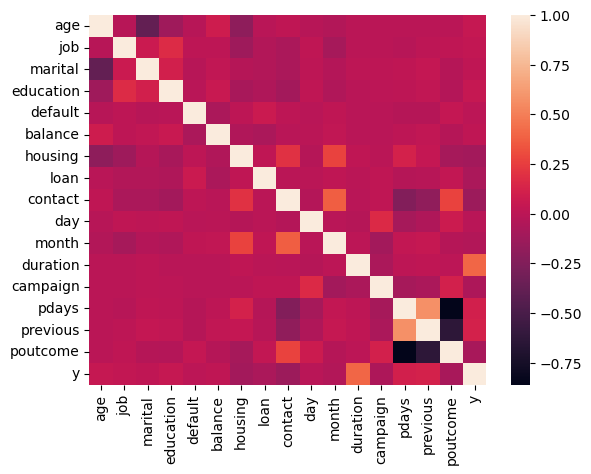

In [82]:
# drwaing the heatmap based on the above co-relation
sns.heatmap(data=fixed_deposit.corr())

In [85]:
# Feature Selection( Selecting the best columns)
from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold(threshold=1)
vt.fit(fixed_deposit)
vt.get_support()

array([ True,  True, False, False, False,  True, False, False, False,
        True,  True,  True,  True,  True,  True, False, False])

# Model Development without Hyper-parameter Tuning

## 1) Decision Tree

accuracy is :  0.8574585635359117
precision is :  0.42857142857142855
f-1 score is :  0.44155844155844154
Recall is :  0.45535714285714285


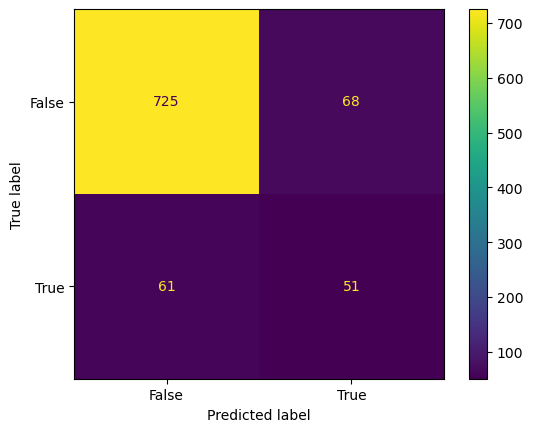

True Negative :  725
False Positive :  68
False Negative :  61
True Positive :  51


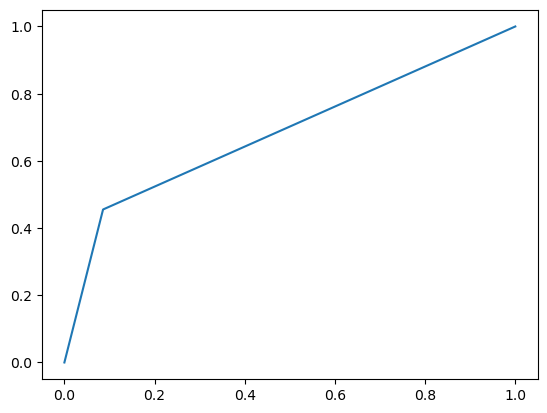

In [90]:
X=fixed_deposit.drop('y',axis=1)
y=fixed_deposit[['y']]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)


from scipy import stats
select_columns=['age','balance','day','duration','campaign','pdays','previous']
z_score=np.abs(stats.zscore(X_train[select_columns]))
threshold=3
outlier_indices=np.where(z_score > threshold)[0]
X_train=X_train.drop(X_train.index[outlier_indices])
y_train=y_train.drop(y_train.index[outlier_indices])



from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred_dt=dt.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve
dt_acc=accuracy_score(y_test,y_pred_dt)
dt_precision=precision_score(y_test,y_pred_dt)
dt_f1=f1_score(y_test,y_pred_dt)
dt_recall=recall_score(y_test,y_pred_dt)
print('accuracy is : ',dt_acc)
print("precision is : ",dt_precision)
print("f-1 score is : ",dt_f1)
print("Recall is : ",dt_recall)


cm=confusion_matrix(y_test,y_pred_dt)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()

tn,fp,fn,tp=confusion_matrix(y_test,y_pred_dt).ravel()
print("True Negative : ",tn)
print("False Positive : ",fp)
print("False Negative : ",fn)
print("True Positive : ",tp)

y_pred_dt_prob=dt.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_dt_prob)
plt.plot(fpr,tpr)
plt.show()

## 2) Logistic Regression

accuracy is :  0.8806629834254144
precision is :  0.5294117647058824
f-1 score is :  0.39999999999999997
Recall is :  0.32142857142857145


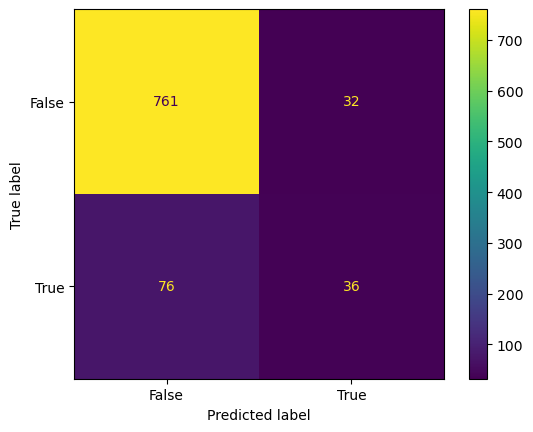

True Negative :  761
False Positive :  32
False Negative :  76
True Positive :  36


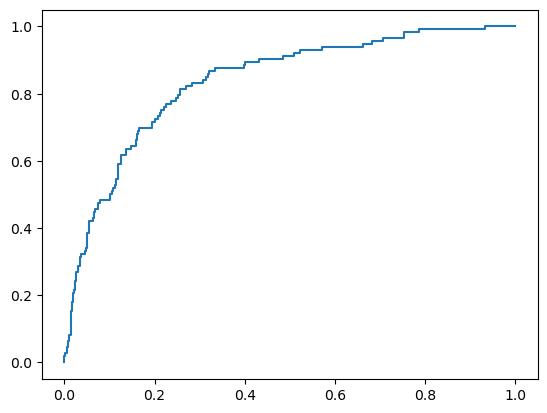

In [91]:
X=fixed_deposit.drop('y',axis=1)
y=fixed_deposit[['y']]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)


from scipy import stats
select_columns=['age','balance','day','duration','campaign','pdays','previous']
z_score=np.abs(stats.zscore(X_train[select_columns]))
threshold=3
outlier_indices=np.where(z_score > threshold)[0]
X_train=X_train.drop(X_train.index[outlier_indices])
y_train=y_train.drop(y_train.index[outlier_indices])



from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

y_pred_lr=lr.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve
lr_acc=accuracy_score(y_test,y_pred_lr)
lr_precision=precision_score(y_test,y_pred_lr)
lr_f1=f1_score(y_test,y_pred_lr)
lr_recall=recall_score(y_test,y_pred_lr)
print('accuracy is : ',lr_acc)
print("precision is : ",lr_precision)
print("f-1 score is : ",lr_f1)
print("Recall is : ",lr_recall)


cm=confusion_matrix(y_test,y_pred_lr)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()

tn,fp,fn,tp=confusion_matrix(y_test,y_pred_lr).ravel()
print("True Negative : ",tn)
print("False Positive : ",fp)
print("False Negative : ",fn)
print("True Positive : ",tp)

y_pred_lr_prob=lr.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_lr_prob)
plt.plot(fpr,tpr)
plt.show()

## 3) Navie Bayes

accuracy is :  0.7834254143646409
precision is :  0.3
f-1 score is :  0.3913043478260869
Recall is :  0.5625


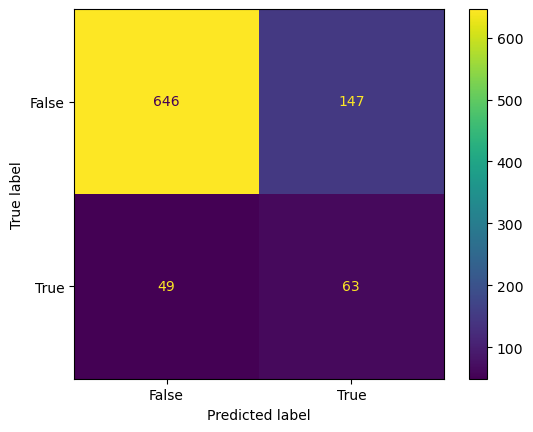

True Negative :  646
False Positive :  147
False Negative :  49
True Positive :  63


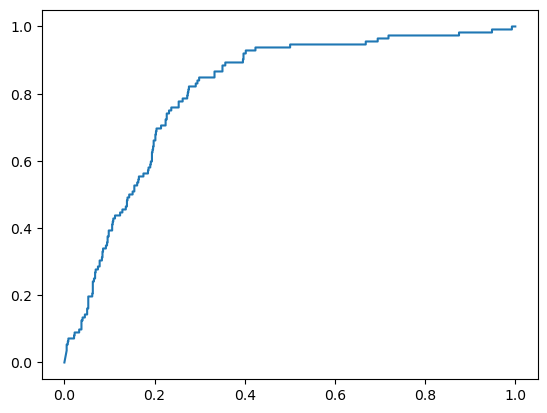

In [92]:
X=fixed_deposit.drop('y',axis=1)
y=fixed_deposit[['y']]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)


from scipy import stats
select_columns=['age','balance','day','duration','campaign','pdays','previous']
z_score=np.abs(stats.zscore(X_train[select_columns]))
threshold=3
outlier_indices=np.where(z_score > threshold)[0]
X_train=X_train.drop(X_train.index[outlier_indices])
y_train=y_train.drop(y_train.index[outlier_indices])



from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

y_pred_nb=nb.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve
nb_acc=accuracy_score(y_test,y_pred_nb)
nb_precision=precision_score(y_test,y_pred_nb)
nb_f1=f1_score(y_test,y_pred_nb)
nb_recall=recall_score(y_test,y_pred_nb)
print('accuracy is : ',nb_acc)
print("precision is : ",nb_precision)
print("f-1 score is : ",nb_f1)
print("Recall is : ",nb_recall)


cm=confusion_matrix(y_test,y_pred_nb)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()

tn,fp,fn,tp=confusion_matrix(y_test,y_pred_nb).ravel()
print("True Negative : ",tn)
print("False Positive : ",fp)
print("False Negative : ",fn)
print("True Positive : ",tp)

y_pred_nb_prob=nb.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_nb_prob)
plt.plot(fpr,tpr)
plt.show()

## 4) Random Forest

accuracy is :  0.8983425414364641
precision is :  0.6724137931034483
f-1 score is :  0.4588235294117647
Recall is :  0.3482142857142857


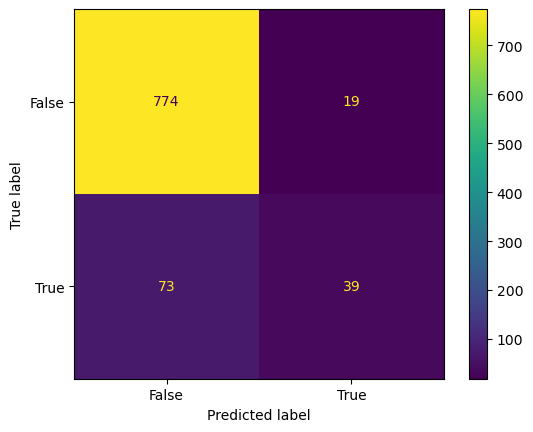

True Negative :  774
False Positive :  19
False Negative :  73
True Positive :  39


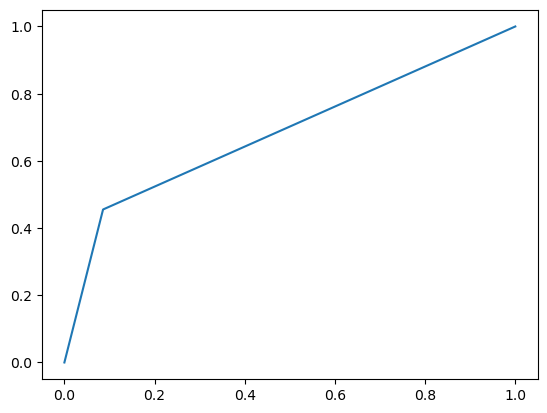

In [93]:
X=fixed_deposit.drop('y',axis=1)
y=fixed_deposit[['y']]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)


from scipy import stats
select_columns=['age','balance','day','duration','campaign','pdays','previous']
z_score=np.abs(stats.zscore(X_train[select_columns]))
threshold=3
outlier_indices=np.where(z_score > threshold)[0]
X_train=X_train.drop(X_train.index[outlier_indices])
y_train=y_train.drop(y_train.index[outlier_indices])



from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

y_pred_rf=rf.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve
rf_acc=accuracy_score(y_test,y_pred_rf)
rf_precision=precision_score(y_test,y_pred_rf)
rf_f1=f1_score(y_test,y_pred_rf)
rf_recall=recall_score(y_test,y_pred_rf)
print('accuracy is : ',rf_acc)
print("precision is : ",rf_precision)
print("f-1 score is : ",rf_f1)
print("Recall is : ",rf_recall)


cm=confusion_matrix(y_test,y_pred_rf)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()

tn,fp,fn,tp=confusion_matrix(y_test,y_pred_rf).ravel()
print("True Negative : ",tn)
print("False Positive : ",fp)
print("False Negative : ",fn)
print("True Positive : ",tp)

y_pred_rf_prob=dt.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_rf_prob)
plt.plot(fpr,tpr)
plt.show()

## 5) KNN

accuracy is :  0.8662983425414365
precision is :  0.40816326530612246
f-1 score is :  0.2484472049689441
Recall is :  0.17857142857142858


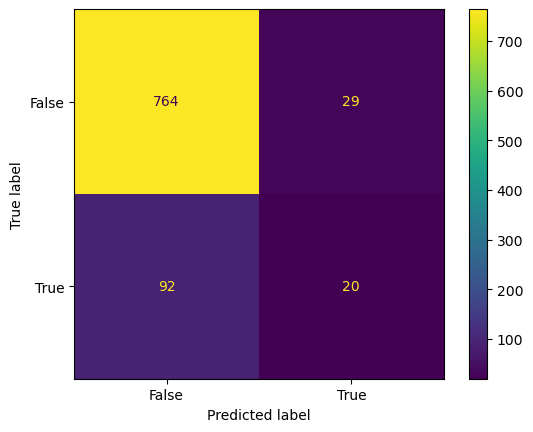

True Negative :  764
False Positive :  29
False Negative :  92
True Positive :  20


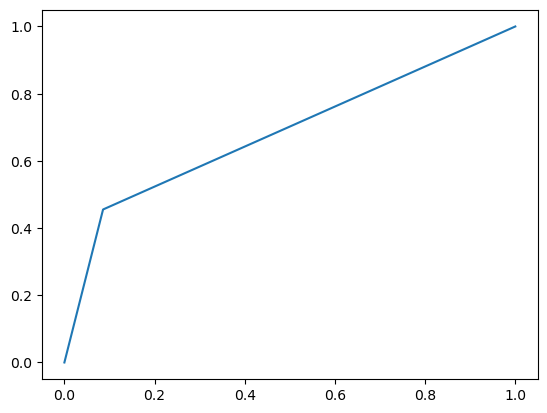

In [94]:
X=fixed_deposit.drop('y',axis=1)
y=fixed_deposit[['y']]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)


from scipy import stats
select_columns=['age','balance','day','duration','campaign','pdays','previous']
z_score=np.abs(stats.zscore(X_train[select_columns]))
threshold=3
outlier_indices=np.where(z_score > threshold)[0]
X_train=X_train.drop(X_train.index[outlier_indices])
y_train=y_train.drop(y_train.index[outlier_indices])



from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

y_pred_knn=knn.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve
knn_acc=accuracy_score(y_test,y_pred_knn)
knn_precision=precision_score(y_test,y_pred_knn)
knn_f1=f1_score(y_test,y_pred_knn)
knn_recall=recall_score(y_test,y_pred_knn)
print('accuracy is : ',knn_acc)
print("precision is : ",knn_precision)
print("f-1 score is : ",knn_f1)
print("Recall is : ",knn_recall)


cm=confusion_matrix(y_test,y_pred_knn)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()

tn,fp,fn,tp=confusion_matrix(y_test,y_pred_knn).ravel()
print("True Negative : ",tn)
print("False Positive : ",fp)
print("False Negative : ",fn)
print("True Positive : ",tp)

y_pred_knn_prob=dt.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_knn_prob)
plt.plot(fpr,tpr)
plt.show()

In [97]:
dict1={'accuracy': [dt_acc,lr_acc,nb_acc,rf_acc,knn_acc],'precision':[dt_precision,lr_precision,nb_precision,rf_precision,knn_precision],
            'f-1 score':[dt_f1,lr_f1,nb_f1,rf_f1,knn_f1], 'recall':[dt_recall,lr_recall,nb_recall,rf_recall,knn_recall]}
without_hyperparameter=pd.DataFrame(dict1,index=['Decision Tree','Logistic Regression','Navie Bayes','Random Forest','KNN'])
without_hyperparameter

,accuracy,precision,f-1 score,recall
Decision Tree,0.857459,0.428571,0.441558,0.455357
Logistic Regression,0.880663,0.529412,0.400000,0.321429
Navie Bayes,0.783425,0.300000,0.391304,0.562500
Random Forest,0.898343,0.672414,0.458824,0.348214
KNN,0.866298,0.408163,0.248447,0.178571


# Model Development with Hyper-Parameter Tuning

## 1) Decision Tree

In [116]:
from sklearn.model_selection import GridSearchCV
grid_dt=DecisionTreeClassifier()
print("Available Parameters are : ",grid_dt.get_params())

param= {
    'criterion':['gini','entropy'],
    'max_depth':[3,4,5,6,7,8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

grid_search=GridSearchCV(grid_dt,param,cv=5,scoring='accuracy',verbose=True)
grid_search.fit(X_train,y_train)
print("============================================================================")
print("Best Parameters are : ",grid_search.best_params_)
print("===========================================================================")
print("Best Score is : ",grid_search.best_score_)

Available Parameters are :  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Parameters are :  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}
Best Score is :  0.9092340274280974


accuray is: 90.06
F1 is: 0.51
Precision is: 0.66
Recall is: 0.41


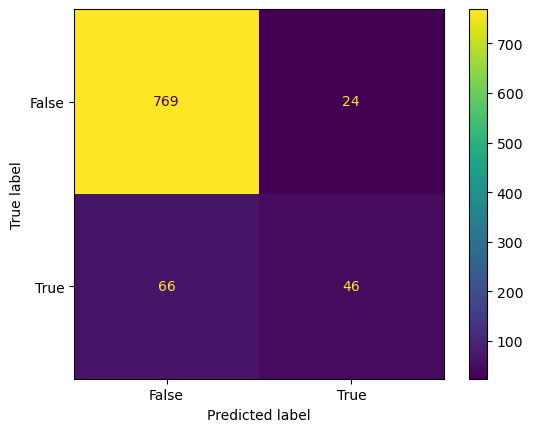

True negative: 769
False postive: 24
False negative: 66
True postive: 46


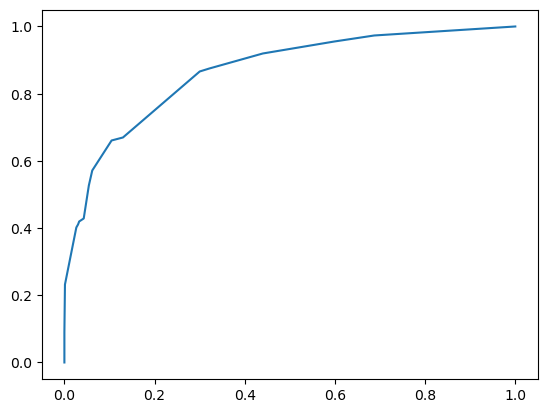

In [119]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy', max_depth= 5, min_samples_leaf= 1, min_samples_split= 2, random_state= 0)
dt.fit(X_train,y_train)

dt.fit(X_train,y_train)


y_pred_dt_with=dt.predict(X_test)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
dt_acc_with=round(accuracy_score(y_test,y_pred_dt_with)*100,2)
dt_precision_with=round(precision_score(y_test,y_pred_dt_with),2)
dt_recall_with=round(recall_score(y_test,y_pred_dt_with),2)
dt_f1_with=round(f1_score(y_test,y_pred_dt_with),2)

print("accuray is:",dt_acc_with)
print("F1 is:",dt_f1_with)
print("Precision is:",dt_precision_with)
print("Recall is:",dt_recall_with)

cmt=confusion_matrix(y_test,y_pred_dt_with)
disp=ConfusionMatrixDisplay(confusion_matrix=cmt,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()


tn,fp,fn,tp=confusion_matrix(y_test,y_pred_dt_with).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)


y_dt_pred_prob_with=dt.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob_with)
plt.plot(fpr,tpr)

## 2) Random Forest

In [127]:

from sklearn.model_selection import GridSearchCV
grid_RF=RandomForestClassifier()
grid_RF

RF_params=[keys for keys in grid_RF.get_params()]
print("The avaialable parameters are : ",RF_params)
print("==============================================================================================")
param_grid={
    'criterion' : ['gini','entropy'],
    'max_depth' : [3,4,5,6,7,8,9],
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
    
}


print("Processing Parameters are : ",param_grid)
print("================================================================================================")
grid_search=GridSearchCV(grid_RF,param_grid,cv=5,scoring='accuracy',verbose=True)
grid_search.fit(X_train,y_train)

best_param=grid_search.best_params_
best_score=grid_search.best_score_
print("Best Parameters are : ",best_param)
print("Best Score is : ",best_score)


The avaialable parameters are :  ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start']
Processing Parameters are :  {'criterion': ['gini', 'entropy'], 'max_depth': [3, 4, 5, 6, 7, 8, 9], 'n_estimators': [100, 200], 'max_features': ['sqrt', 'log2', None], 'random_state': [0, 42]}
Fitting 5 folds for each of 168 candidates, totalling 840 fits
Best Parameters are :  {'criterion': 'gini', 'max_depth': 9, 'max_features': None, 'n_estimators': 200, 'random_state': 0}
Best Score is :  0.9101764363219889


Accuracy is :  0.887292817679558
F1 score is :  0.4631578947368421
Recall score is :  0.39285714285714285
Precision is :  0.5641025641025641


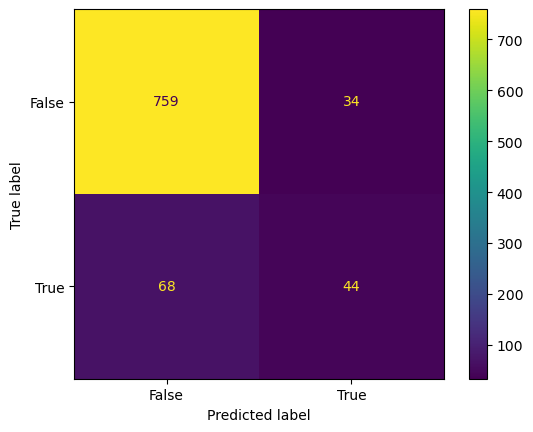

True Negative :  759
False Positive :  34
False Negative :  68
True Positive :  44


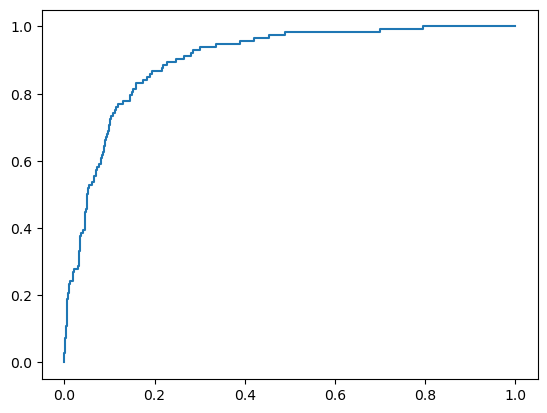

In [130]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion= 'gini', max_depth= 9, max_features= None, n_estimators= 200, random_state= 0)
rf.fit(X_train,y_train)

y_pred_rf_with=rf.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
rf_acc_with=accuracy_score(y_test,y_pred_rf_with)
rf_f1_with=f1_score(y_test,y_pred_rf_with)
rf_recall_with=recall_score(y_test,y_pred_rf_with)
rf_precision_with=precision_score(y_test,y_pred_rf_with)

print("Accuracy is : ",rf_acc_with)
print("F1 score is : ",rf_f1_with)
print("Recall score is : ",rf_recall_with)
print("Precision is : ",rf_precision_with)

cmd=confusion_matrix(y_test,y_pred_rf_with)
disp=ConfusionMatrixDisplay(confusion_matrix=cmd,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()


tn,fp,fn,tp=confusion_matrix(y_test,y_pred_rf_with).ravel()
print("True Negative : ",tn)
print("False Positive : ",fp)
print("False Negative : ",fn)
print("True Positive : ",tp)


y_pred_rf_prob_with=rf.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_rf_prob_with)
plt.plot(fpr,tpr)
plt.show()

## 3) KNN

In [120]:
from sklearn.model_selection import GridSearchCV
grid_KNN=KNeighborsClassifier()
grid_KNN
KNN_param=[i for i in grid_KNN.get_params()]
print("Available Parameters are : ",KNN_param)

print("==============================================")

param_grid={
    'algorithm':['auto', 'ball_tree', 'kd_te'],
    "n_neighbors":[5,6,7,10],
    "leaf_size":[20,30,40,50]
}

grid_search=GridSearchCV(grid_KNN,param_grid,cv=5,verbose=True,scoring='accuracy')
grid_search.fit(X_train,y_train)

print("The Best Parameters are : ",grid_search.best_params_)
print("The best score is : ",grid_search.best_score_)

Available Parameters are :  ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights']
Fitting 5 folds for each of 48 candidates, totalling 240 fits
The Best Parameters are :  {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 10}
The best score is :  0.8966717020625377


Accuracy is :  0.8784530386740331
F1 score is :  0.22535211267605632
Recall score is :  0.14285714285714285
Precision is :  0.5333333333333333


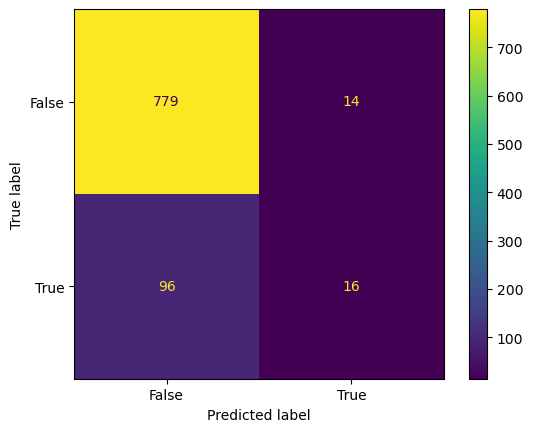

True Negative :  779
False Positive :  14
False Negative :  96
True Positive :  16


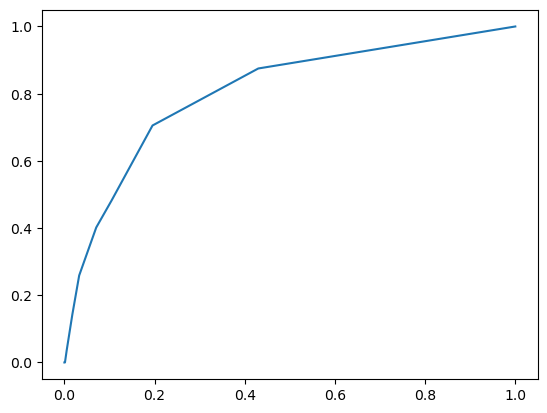

In [121]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(algorithm= 'auto', leaf_size=20, n_neighbors= 10)
knn.fit(X_train,y_train)

y_pred_knn_with=knn.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
knn_acc_with=accuracy_score(y_test,y_pred_knn_with)
knn_f1_with=f1_score(y_test,y_pred_knn_with)
knn_recall_with=recall_score(y_test,y_pred_knn_with)
knn_precision_with=precision_score(y_test,y_pred_knn_with)

print("Accuracy is : ",knn_acc_with)
print("F1 score is : ",knn_f1_with)
print("Recall score is : ",knn_recall_with)
print("Precision is : ",knn_precision_with)

cmd=confusion_matrix(y_test,y_pred_knn_with)
disp=ConfusionMatrixDisplay(confusion_matrix=cmd,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()


tn,fp,fn,tp=confusion_matrix(y_test,y_pred_knn_with).ravel()
print("True Negative : ",tn)
print("False Positive : ",fp)
print("False Negative : ",fn)
print("True Positive : ",tp)


y_pred_knn_prob_with=knn.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_knn_prob_with)
plt.plot(fpr,tpr)
plt.show()

## 4) Navie Bayes

In [122]:
from sklearn.model_selection import GridSearchCV
grid_nb=GaussianNB()
print("Available Parameters are : ",grid_nb.get_params())

print("===================================================================")

param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

grid_search=GridSearchCV(grid_nb,param_grid,cv=5,verbose=True,scoring='accuracy')
grid_search.fit(X_train,y_train)

print("The best parameters are  : ",grid_search.best_params_)
print("The Best score is : ",grid_search.best_score_)

Available Parameters are :  {'priors': None, 'var_smoothing': 1e-09}
Fitting 5 folds for each of 100 candidates, totalling 500 fits
The best parameters are  :  {'var_smoothing': 0.005336699231206307}
The Best score is :  0.9026386461696434


Accuracy score is :  0.8828729281767956
F-1 score is :  0.4301075268817204
Recall score is :  0.35714285714285715
Precision score is :  0.5405405405405406


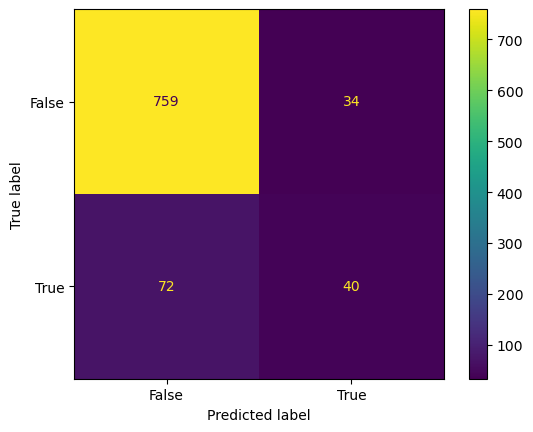

True Negative :  759
False Positive :  34
False Negative :  72
True Positive :  40


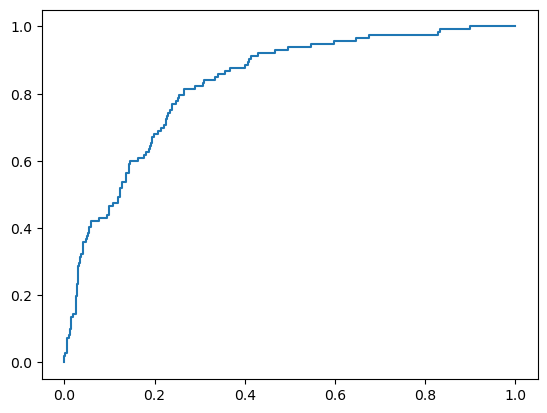

In [123]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB(var_smoothing=0.005336699231206307)

nb.fit(X_train,y_train)

y_pred_nb_with=nb.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
nb_acc_with=accuracy_score(y_test,y_pred_nb_with)
nb_f1_with=f1_score(y_test,y_pred_nb_with)
nb_recall_with=recall_score(y_test,y_pred_nb_with)
nb_precision_with=precision_score(y_test,y_pred_nb_with)

print("Accuracy score is : ",nb_acc_with)
print("F-1 score is : ",nb_f1_with)
print("Recall score is : ",nb_recall_with)
print("Precision score is : ",nb_precision_with)

cmd=confusion_matrix(y_test,y_pred_nb_with)
disp=ConfusionMatrixDisplay(confusion_matrix=cmd,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()


tn,fp,fn,tp=confusion_matrix(y_test,y_pred_nb_with).ravel()
print("True Negative : ",tn)
print("False Positive : ",fp)
print("False Negative : ",fn)
print("True Positive : ",tp)


y_pred_nb_prob_with=nb.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_nb_prob_with)
plt.plot(fpr,tpr)
plt.show()


## 5) Logistic Regression

In [124]:
from sklearn.model_selection import GridSearchCV
grid_lr=LogisticRegression()

print("Available Parameters are : ",grid_lr.get_params())
print("=========================================================")

param_grid={
    'penalty': ['l1', 'l2'],  
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
}

grid_search=GridSearchCV(grid_lr,param_grid,cv=5,scoring='accuracy',verbose=True)
grid_search.fit(X_train,y_train)

print("The best parameters are : ",grid_search.best_params_)
print("The Best score is : ",grid_search.best_score_)

Available Parameters are :  {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Fitting 5 folds for each of 60 candidates, totalling 300 fits
The best parameters are :  {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
The Best score is :  0.9092335337618357


Accuracy score is :  0.8773480662983425
F-1 score is :  0.44776119402985076
Recall score is :  0.4017857142857143
Precision score is :  0.5056179775280899


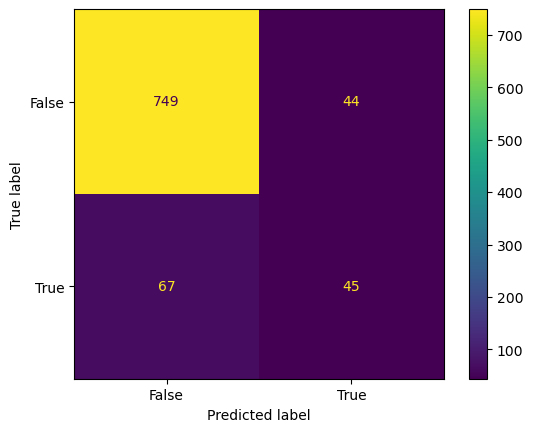

True Negative :  749
False Positive :  44
False Negative :  67
True Positive :  45


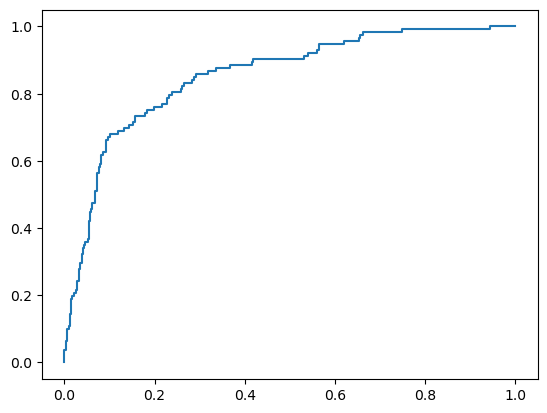

In [125]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C= 100, penalty= 'l1', solver= 'liblinear')
lr.fit(X_train,y_train)

y_pred_lr_with=lr.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
lr_acc_with=accuracy_score(y_test,y_pred_lr_with)
lr_f1_with=f1_score(y_test,y_pred_lr_with)
lr_recall_with=recall_score(y_test,y_pred_lr_with)
lr_precision_with=precision_score(y_test,y_pred_lr_with)

print("Accuracy score is : ",lr_acc_with)
print("F-1 score is : ",lr_f1_with)
print("Recall score is : ",lr_recall_with)
print("Precision score is : ",lr_precision_with)

cmd=confusion_matrix(y_test,y_pred_lr_with)
disp=ConfusionMatrixDisplay(confusion_matrix=cmd,display_labels=[False,True])
disp.plot()
plt.grid(False)
plt.show()


tn,fp,fn,tp=confusion_matrix(y_test,y_pred_lr_with).ravel()
print("True Negative : ",tn)
print("False Positive : ",fp)
print("False Negative : ",fn)
print("True Positive : ",tp)


y_pred_lr_prob_with=lr.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_lr_prob_with)
plt.plot(fpr,tpr)
plt.show()


In [132]:
dict2={'accuracy': [dt_acc_with,lr_acc_with,nb_acc_with,rf_acc_with,knn_acc_with],'precision':[dt_precision_with,lr_precision_with,nb_precision_with,rf_precision_with,knn_precision_with],
            'f-1 score':[dt_f1_with,lr_f1_with,nb_f1_with,rf_f1_with,knn_f1_with], 'recall':[dt_recall_with,lr_recall_with,nb_recall_with,rf_recall_with,knn_recall_with]}
with_hyperparameter=pd.DataFrame(dict2,index=['Decision Tree','Logistic Regression','Navie Bayes','Random Forest','KNN'])
with_hyperparameter

,accuracy,precision,f-1 score,recall
Decision Tree,90.060000,0.660000,0.510000,0.410000
Logistic Regression,0.877348,0.505618,0.447761,0.401786
Navie Bayes,0.882873,0.540541,0.430108,0.357143
Random Forest,0.887293,0.564103,0.463158,0.392857
KNN,0.878453,0.533333,0.225352,0.142857


In [133]:
without_hyperparameter

,accuracy,precision,f-1 score,recall
Decision Tree,0.857459,0.428571,0.441558,0.455357
Logistic Regression,0.880663,0.529412,0.400000,0.321429
Navie Bayes,0.783425,0.300000,0.391304,0.562500
Random Forest,0.898343,0.672414,0.458824,0.348214
KNN,0.866298,0.408163,0.248447,0.178571
